In [1]:
import numpy as np
import sunpy
import sunpy.map    
import matplotlib.pyplot as plt
import astropy
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from sunpy.coordinates import get_horizons_coord

In [7]:
hmi_los_map = sunpy.map.Map("../../src/HMI/20221024/lvl15/hmi.M_45s.20221024_192100_TAI.2.magnetogram.fits")
fake_hmi_header = sunpy.map.make_fitswcs_header(hmi_los_map.data.shape,
                                                SkyCoord(0*u.arcsec, 0*u.arcsec,
                                                         obstime=hmi_los_map.reference_coordinate.obstime,
                                                         observer=get_horizons_coord("solar orbiter",time=hmi_los_map.reference_coordinate.obstime),
                                                         rsun=hmi_los_map.reference_coordinate.rsun,
                                                         frame="helioprojective"),
                                                scale=u.Quantity(hmi_los_map.scale),
                                                telescope=hmi_los_map.meta["telescop"])

fake_hmi_map = hmi_los_map.reproject_to(WCS(fake_hmi_header))
fake_hmi_map.save("../../src/coalign_map/test_fake_hmi.fits",overwrite=True)

INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


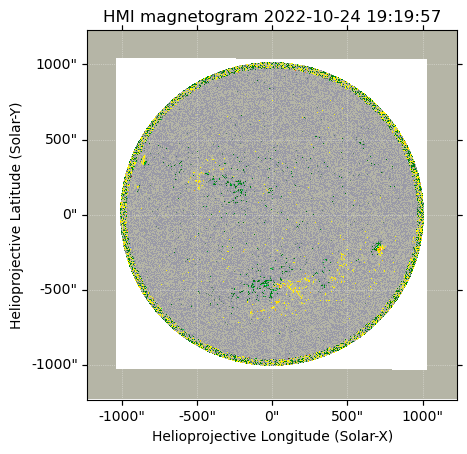

In [12]:
hmi_los_map.plot(cmap="hmimag")

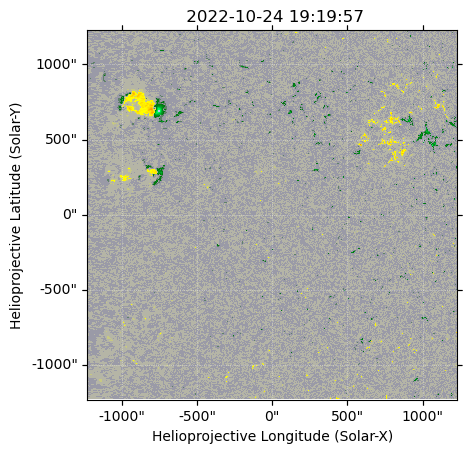

In [13]:
fake_hmi_map.plot(cmap="hmimag")

In [8]:
fake_hmi_map_back = fake_hmi_map.reproject_to(hmi_los_map.wcs)
fake_hmi_map_back.save("../../src/coalign_map/test_fake_hmi_back.fits",overwrite=True)

In [4]:
hmi_los_map.reference_coordinate.rsun

<Quantity 696000. km>

In [3]:
hmi_los_map_mod_rsun_ref = sunpy.map.Map("../../src/HMI/20221024/lvl15/hmi.M_45s.20221024_192100_TAI.2.magnetogram.fits")
hmi_los_map_mod_rsun_ref.meta['rsun_ref'] = 695700000.0
hmi_los_map_mod_rsun_ref.save("../../src/coalign_map/hmi_mod_rsun_ref.fits",overwrite=True)

fake_hmi_header_rsun_ref = sunpy.map.make_fitswcs_header(hmi_los_map_mod_rsun_ref.data.shape,
                                                SkyCoord(0*u.arcsec, 0*u.arcsec,
                                                         obstime=hmi_los_map_mod_rsun_ref.reference_coordinate.obstime,
                                                         observer=get_horizons_coord("solar orbiter",time=hmi_los_map_mod_rsun_ref.reference_coordinate.obstime),
                                                         rsun=hmi_los_map_mod_rsun_ref.reference_coordinate.rsun,
                                                         frame="helioprojective"),
                                                scale=u.Quantity(hmi_los_map_mod_rsun_ref.scale))
fake_hmi_map_rsun_ref = hmi_los_map_mod_rsun_ref.reproject_to(WCS(fake_hmi_header_rsun_ref))
fake_hmi_map_rsun_ref.save("../../src/coalign_map/test_fake_hmi_rsun_ref.fits",overwrite=True)

INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


In [5]:
hmi_los_map_mod_rsun_ref.reference_coordinate.rsun

<Quantity 695700. km>